<a href="https://colab.research.google.com/github/NimsW20/TensorFlow-Tutorial/blob/main/Predict_Health_Costs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')

--2024-06-22 14:07:27--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2024-06-22 14:07:27 (4.68 MB/s) - ‘insurance.csv’ saved [50264/50264]



In [ ]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
dataset.isna().sum()
dataset = dataset.dropna()

In [ ]:
# Make sure to convert categorical data to numbers.
dataset['sex'] = dataset['sex'].map({'female': 0, 'male': 1})
dataset['smoker'] = dataset['smoker'].map({'no': 0, 'yes': 1})
dataset['region'] = dataset['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})

In [ ]:
#change datatype of all columns to float
dataset = dataset.astype(float)

In [ ]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19.0,0.0,27.9,0.0,1.0,0.0,16884.92
1,18.0,1.0,33.8,1.0,0.0,1.0,1725.55
2,28.0,1.0,33.0,3.0,0.0,1.0,4449.46
3,33.0,1.0,22.7,0.0,0.0,2.0,21984.47
4,32.0,1.0,28.9,0.0,0.0,2.0,3866.86


In [ ]:
# Use 80% of the data as the train_dataset and 20% of the data as the test_dataset.
test_dataset = dataset.sample(frac=0.2)
train_dataset = dataset.drop(test_dataset.index)

train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

In [ ]:
train_dataset.head()

,age,sex,bmi,children,smoker,region
1,18.0,1.0,33.8,1.0,0.0,1.0
3,33.0,1.0,22.7,0.0,0.0,2.0
5,31.0,0.0,25.7,0.0,0.0,1.0
7,37.0,0.0,27.7,3.0,0.0,2.0
8,37.0,1.0,29.8,2.0,0.0,3.0


In [ ]:
normalizer = layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))

model = keras.Sequential([
    normalizer,
    layers.Dense(32),
    layers.Dense(4),
    layers.Dropout(.2),
    layers.Dense(1),
])

In [ ]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.06),
    loss='mae',
    metrics=['mae', 'mse']
)
model.build()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normaliza  (None, 6)                 13        
 tion)                                                           
                                                                 
 dense_6 (Dense)             (None, 32)                224       
                                                                 
 dense_7 (Dense)             (None, 4)                 132       
                                                                 
 dropout_2 (Dropout)         (None, 4)                 0         
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 374 (1.46 KB)
Trainable params: 361 (1.41 KB)
Non-trainable params: 13 (56.00 Byte)
______________________

In [ ]:
history = model.fit(train_dataset, train_labels, epochs=155, validation_split = 0.5, batch_size=32, verbose=0)
print(history)

9/9 - 0s - loss: 3627.6421 - mae: 3627.6421 - mse: 42486188.0000 - 57ms/epoch - 6ms/step
Testing set Mean Abs Error: 3627.64 expenses
The Mean Abs Error must be less than 3500. Keep trying.
9/9 [==============================] - 0s 2ms/step


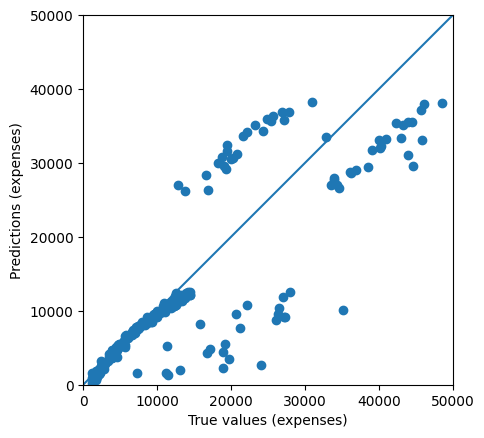

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
